In [322]:
%matplotlib inline
from matplotlib.pylab import *
import seaborn as sns
import numpy as np
from collections import defaultdict
import random

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 32}

matplotlib.rc('font', **font)

sns.set_context("notebook", font_scale=1.8, rc={"lines.linewidth": 2.5})

In [323]:
from sklearn.svm import SVC

In [324]:
import random

N_samples = 20000

def generate_sample_data(gamma,discrimination,noise):
    random.seed(0)
#    np.random.seed(0)
    input_data = np.zeros((N_samples,3),dtype = np.int)
    gender = np.random.randint(0,2,size =(N_samples,)) #gender
    input_data[:,0] = [g if random.random() > (1.0-gamma) else 0 for g in gender ]
    input_data[:,1] = np.random.randint(0,21,size = (N_samples,)) #performance
    output_data = input_data[:,1]-gender*10*discrimination+np.random.randint(0,noise,size = (N_samples,))-np.random.randint(0,noise,size = (N_samples,)) > 10
    return input_data,output_data,gender

def train_svc(input_data,output_data,N_training):
    svc = SVC(gamma = 0.1)
    svc.fit(input_data[:N_training],output_data[:N_training])
    return svc

def measure_performance(svc,input_data,output_data,N_training):
    predictions = svc.predict(input_data[N_training:]) == output_data[N_training:]
    fidelity = sum(predictions)/float(len(predictions))
    baseline = sum(output_data[N_training:,])/float(len(output_data[N_training:]))
    return fidelity,baseline

In [337]:
N_training = N_samples/2

fidelity_vs_gamma = []
baseline_vs_gamma = []
algorithm_gamma_vs_gamma = []
tau_vs_gamma = []
gammas = np.linspace(0,1,200)

for gamma in gammas:

    input_data,output_data,gender = generate_sample_data(gamma,0.5,5)
    tau_vs_gamma.append(sum(gender*output_data)/float(sum((1-gender)*output_data))*sum(gender)/float(sum(1-gender)))
    baseline_vs_gamma.append(1-sum(output_data)/float(len(output_data)))
    svc = train_svc(input_data,output_data,N_training)
    svc_output = svc.predict(input_data[N_training:])
    algorithm_gamma = sum(gender[N_training:]*svc_output)/float(sum((1-gender[N_training:])*svc_output))*sum(gender[N_training:])/float(sum(1-gender[N_training:]))
    algorithm_gamma_vs_gamma.append(algorithm_gamma)
    fidelity,baseline = measure_performance(svc,input_data,output_data,N_training)
    fidelity_vs_gamma.append(fidelity)


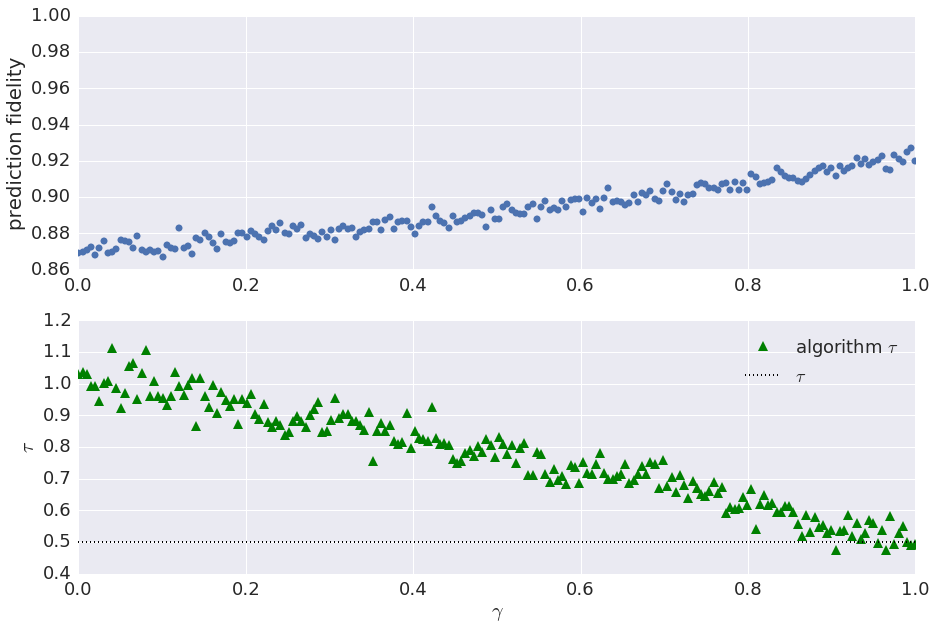

In [340]:
from matplotlib import gridspec
figure(figsize = (20,10))
gs = gridspec.GridSpec(2, 1, width_ratios=[3, 1])
subplot(gs[0])
plot(gammas,fidelity_vs_gamma,ls = '',marker = 'o')
ylim(top = 1)
ylabel("prediction fidelity")
subplot(gs[1])
#plot(gammas,baseline_vs_gamma,ls = '',marker = '.')
plot(gammas,algorithm_gamma_vs_gamma,ls = '',marker = '^',color = 'green',markersize = 10)
axhline(np.mean(tau_vs_gamma),ls = ':',color = 'black',lw = 2)
legend([r'algorithm $\tau$',r'$\tau$'],loc= 'upper right')
ylabel(r"$\tau$")
xlabel(r"$\gamma$")
#plot(gammas,tau_vs_gamma,ls = '',marker = '^')